In [8]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.insert(0, "../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import seqad
import pandas as pd
from matplotlib import pyplot as plt

In [81]:
window = 100
batch_size = 45
df = pd.read_csv('../save_csv/synthetic_ts.csv', index_col=0)
X = df.values
X = (X - X.mean(axis=0)) / X.std(axis=0)
n_features = X.shape[1]

In [82]:
import numpy as np

In [90]:
XX = np.lib.stride_tricks.sliding_window_view(X, window, axis = 0)
XX = XX.reshape(-1, window * n_features)

In [91]:
# from pyod.models.knn import KNN
# from pyod.models.iforest import IForest

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0, contamination=0.1)
clf.fit(XX)

IsolationForest(contamination=0.1, max_samples=100, random_state=0)

In [92]:
scores = clf.score_samples(XX)
anom = clf.predict(XX)

(array([   46.,    61.,   994.,  5830.,  7551., 14077., 24220., 28337.,
        15247.,  3538.]),
 array([-0.6258884 , -0.60463094, -0.58337348, -0.56211602, -0.54085855,
        -0.51960109, -0.49834363, -0.47708617, -0.45582871, -0.43457124,
        -0.41331378]),
 <BarContainer object of 10 artists>)

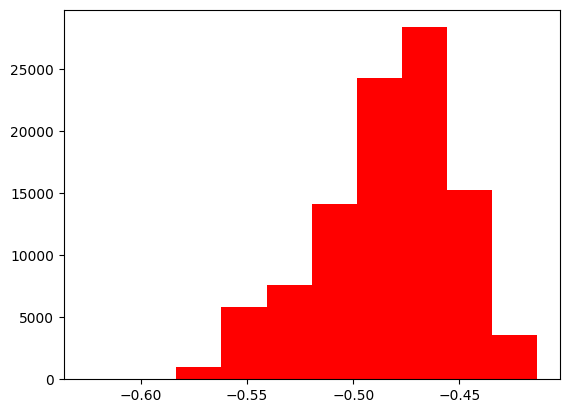

In [93]:
plt.hist(scores, color = "r", bins = 10)

In [60]:
scores

array([ 0.00387673, -0.01895745, -0.00585454, ..., -0.00577219,
       -0.00326869,  0.00880211])

In [61]:
# clf = KNN(
#     n_neighbors=10
# )
clf = IForest(
    n_estimators=100,
)

In [43]:
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

(array([2.4946e+04, 2.0870e+04, 1.3068e+04, 9.2580e+03, 7.6980e+03,
        4.6090e+03, 2.9870e+03, 1.5320e+03, 4.9500e+02, 1.9800e+02,
        1.3400e+02, 2.5000e+01, 8.0000e+00, 1.0000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
         0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
         0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
         0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 30 artists>)

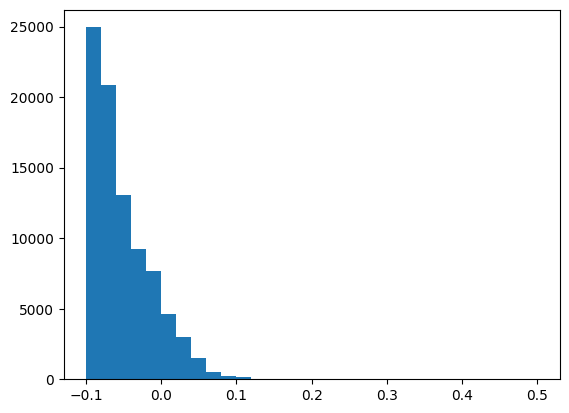

In [44]:
scores = clf.decision_scores_
# plt.xlim(xmin=0, xmax = 0.1)
plt.hist(scores, bins = 30, range=(-0.1, 0.5))

In [ ]:
i

In [31]:
scores

array([0.04364583, 0.07952225, 0.04392583, ..., 0.08068888, 0.08152099,
       0.05387718])